In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from pathlib import Path
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
sns.set()

In [11]:
file_path = Path('data/stock_prices.csv')
file_path

WindowsPath('data/stock_prices.csv')

In [15]:
df = pd.read_csv(file_path, sep=',')
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [21]:
df.describe()

,open,high,low,close,volume
count,497461.000000,497464.000000,497464.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.471228,102.312062,100.570957,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [29]:
df.isna().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [31]:
df_copy = df.copy()

<Axes: >

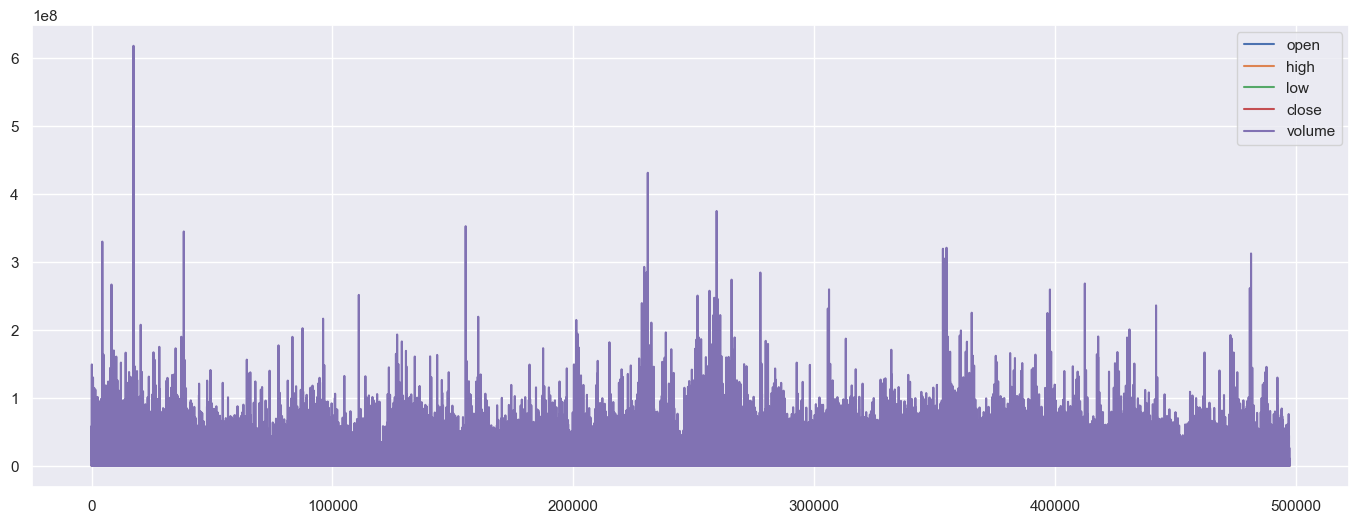

In [39]:
df.plot(figsize=(17, 6))

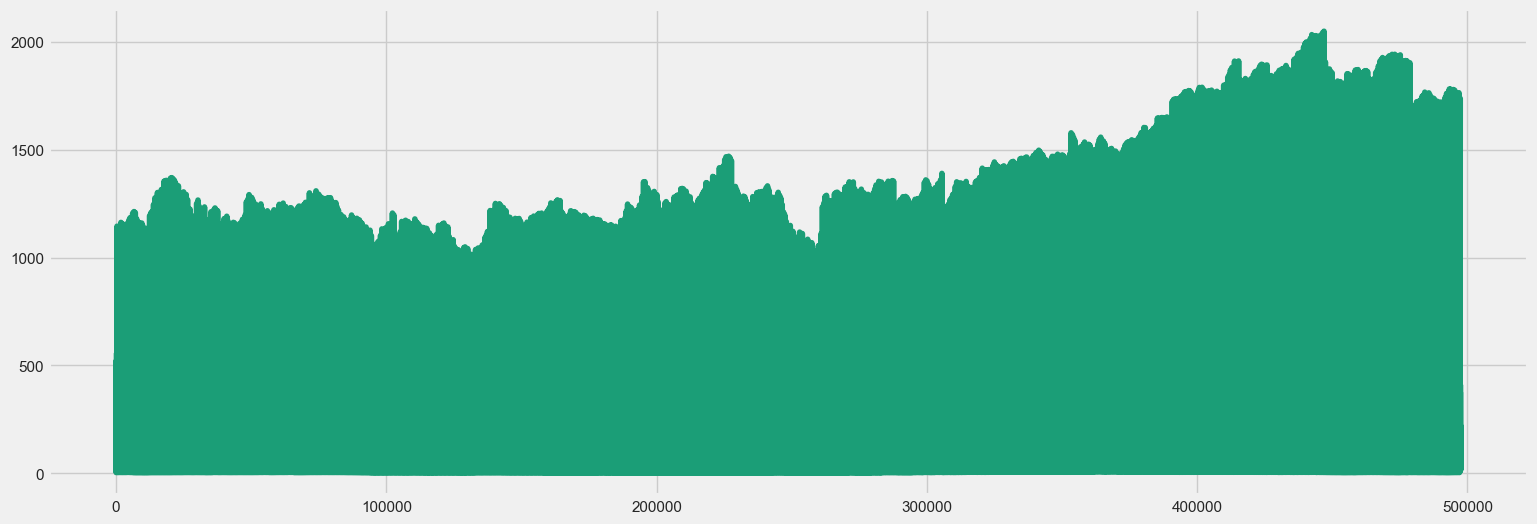

In [65]:
plt.style.use('fivethirtyeight')
df.close.plot(colormap = 'Dark2', figsize = (17, 6))
plt.show()

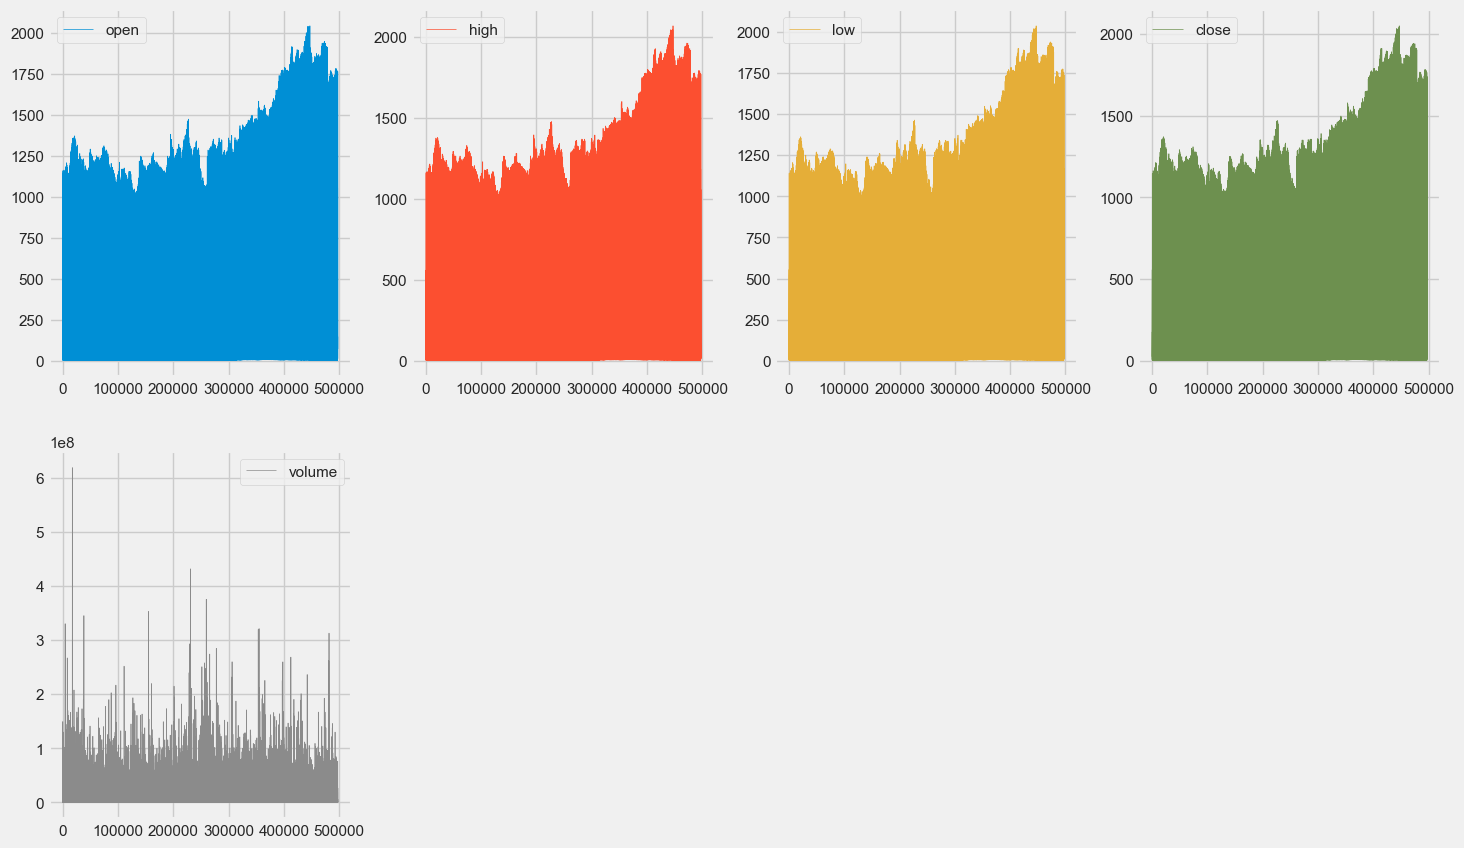

In [51]:
df.plot(subplots=True,
       linewidth = 0.5, 
       layout=(2, 4), 
       figsize = (16,  10),
       sharex = False, 
       sharey = False)
plt.show()

<Axes: ylabel='Density'>

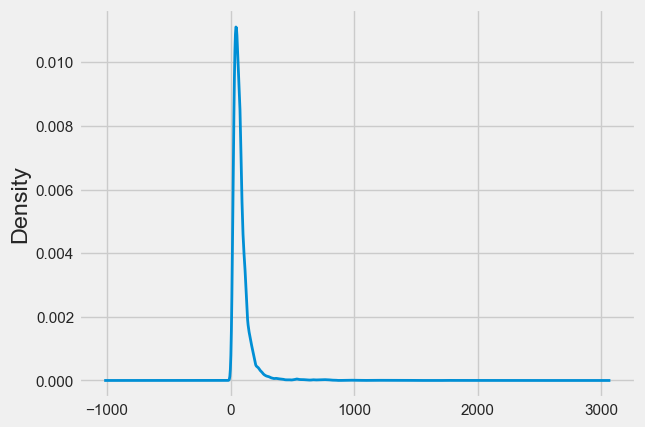

In [69]:
df.close.plot(kind = 'density', linewidth=2)

<Axes: >

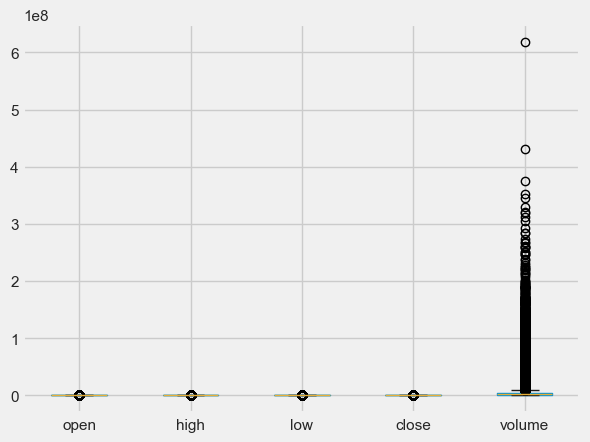

In [73]:
df.boxplot()

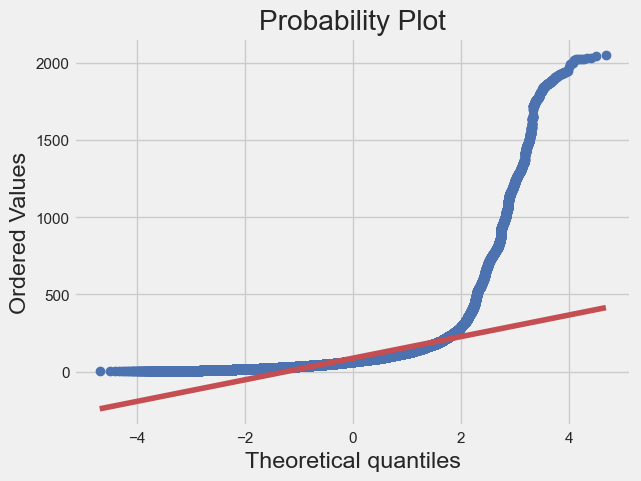

In [77]:
scipy.stats.probplot(df.close, plot=pylab)
plt.show()

In [81]:
df['date'] = pd.to_datetime(df.date)

In [83]:
df.dtypes

symbol            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object

In [85]:
df.set_index('date', inplace = True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497461 entries, 2014-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497461 non-null  object 
 1   open    497461 non-null  float64
 2   high    497461 non-null  float64
 3   low     497461 non-null  float64
 4   close   497461 non-null  float64
 5   volume  497461 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 26.6+ MB


In [107]:
# now i have all entries in daily frequency so need to downscale it

In [153]:
df.columns

Index(['symbol', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [155]:
del df['symbol']

In [165]:
df = df.resample('M').mean()

C:\Users\khali\AppData\Local\Temp\ipykernel_12348\2208127587.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').mean()


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-31 to 2017-12-31
Freq: ME
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    48 non-null     float64
 1   high    48 non-null     float64
 2   low     48 non-null     float64
 3   close   48 non-null     float64
 4   volume  48 non-null     float64
dtypes: float64(5)
memory usage: 2.2 KB


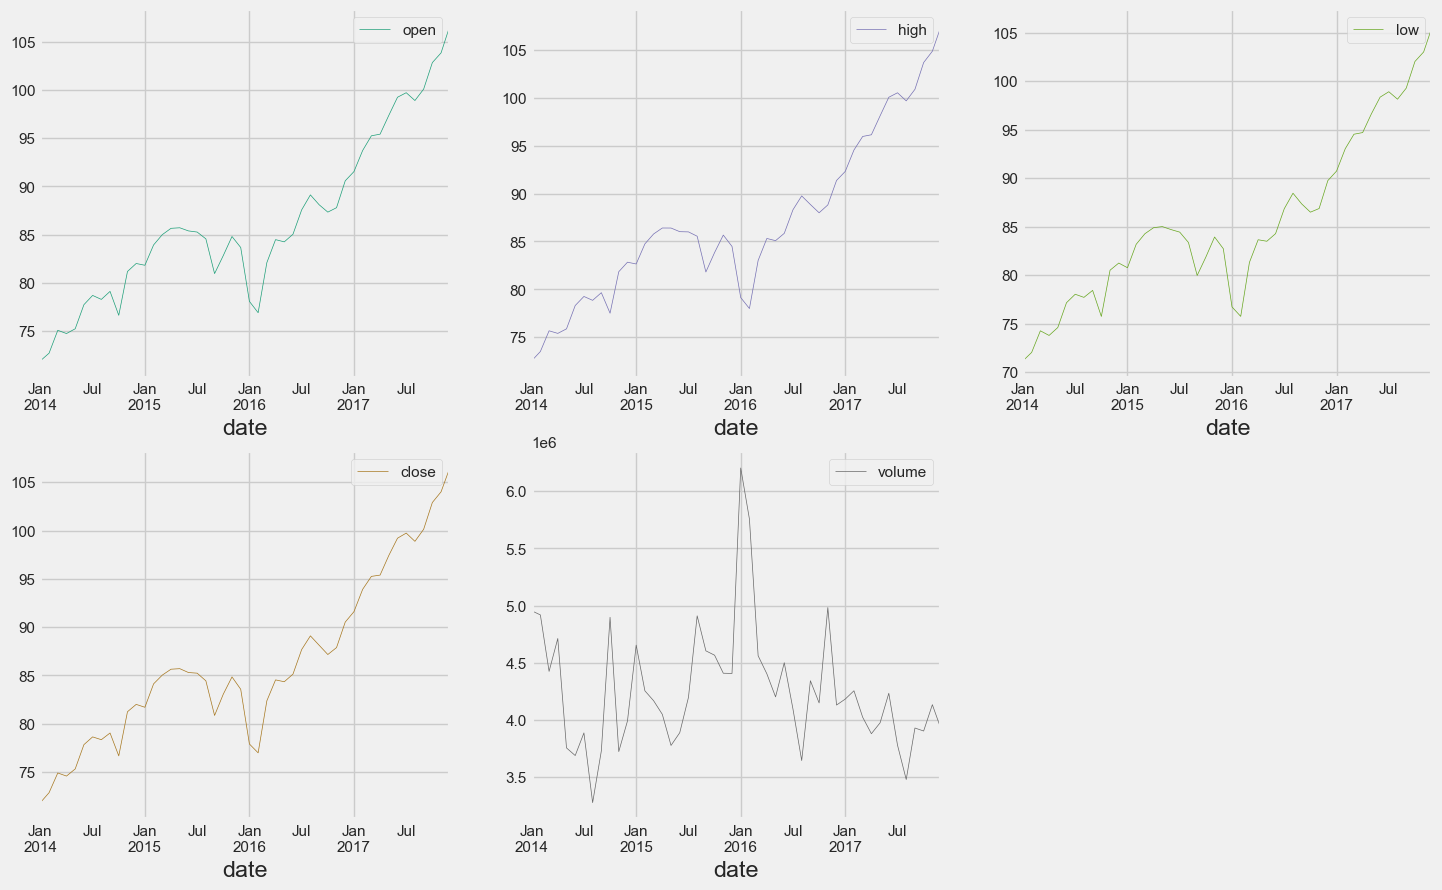

In [207]:
plt.style.use('fivethirtyeight')
df.plot(subplots=True,
       colormap = 'Dark2',
       linewidth = 0.5, 
       layout=(2, 3), 
       figsize = (16,  10),
       sharex = False, 
       sharey = False)
plt.show()

<Axes: xlabel='date'>

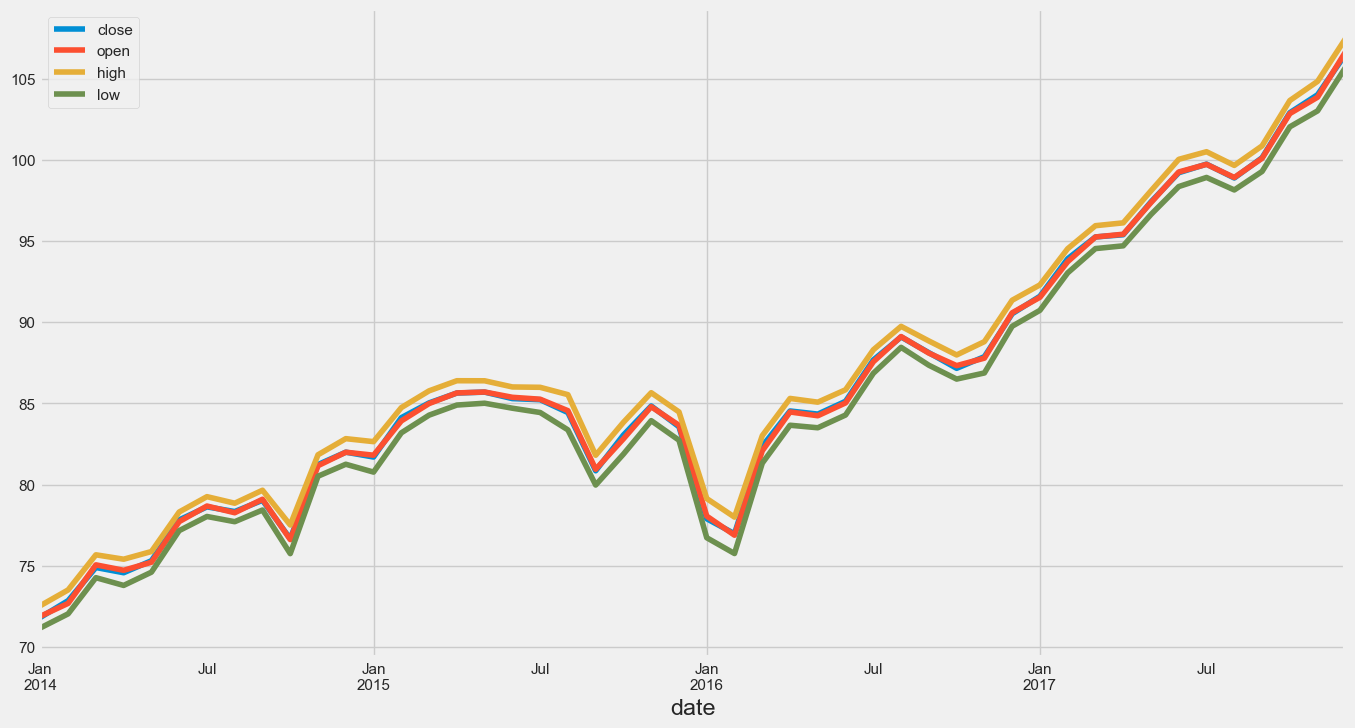

In [235]:
df[['close', 'open', 'high', 'low']].plot(figsize=(15, 8))

<Axes: xlabel='date'>

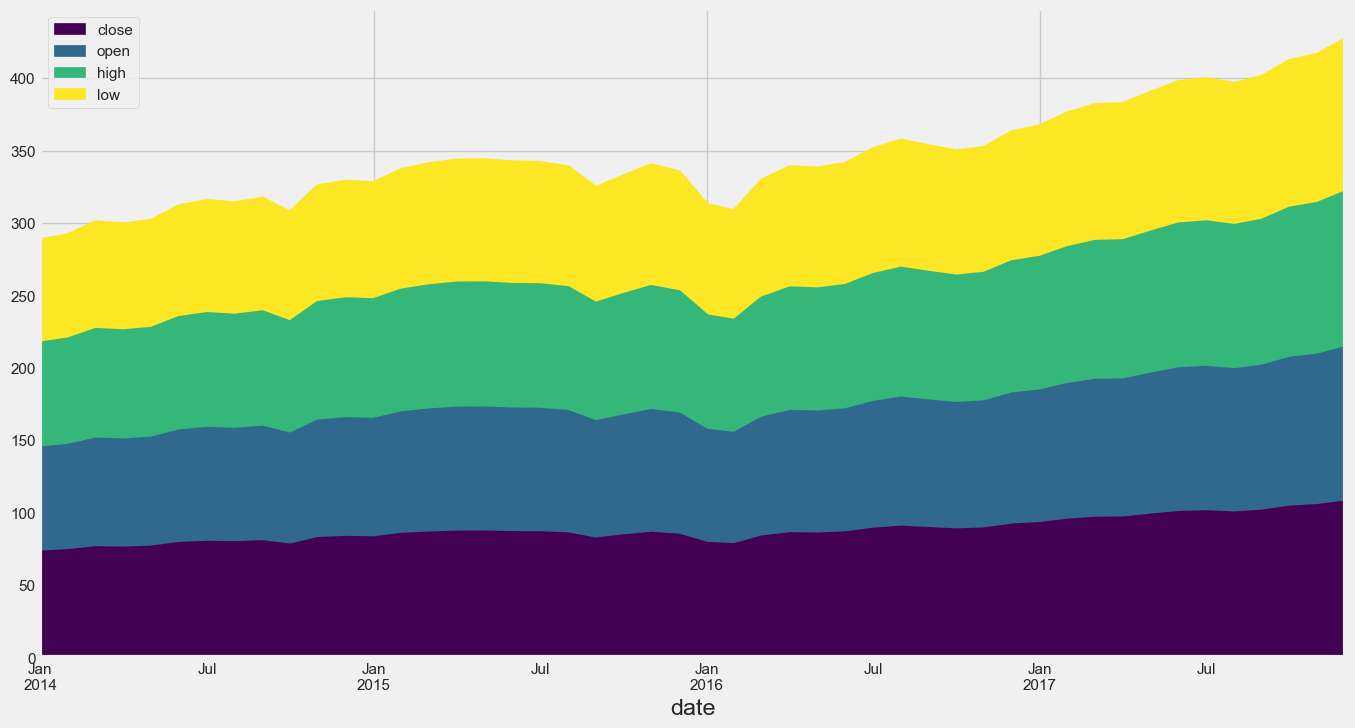

In [237]:
df[['close', 'open', 'high', 'low']].plot.area(colormap='viridis', figsize=(15, 8))

In [239]:
size = int(len(df)*0.8)

In [241]:
df_copy = df.copy()

In [243]:
df_train = df.iloc[:size]

In [245]:
df_test = df.iloc[size:]

In [247]:
df = df_train

In [249]:
df.tail(3)

,open,high,low,close,volume
date,,,,,
2016-12-31,90.585348,91.359026,89.757283,90.525782,4.130377e+06
2017-01-31,91.540109,92.303731,90.738285,91.603679,4.182645e+06
2017-02-28,93.732247,94.533219,93.044216,93.918042,4.255275e+06


In [251]:
df_test.head(3)

,open,high,low,close,volume
date,,,,,
2017-03-31,95.253987,95.949169,94.539381,95.256957,4.024055e+06
2017-04-30,95.424420,96.124732,94.709695,95.391409,3.879889e+06
2017-05-31,97.372383,98.098995,96.640558,97.419830,3.975171e+06


In [567]:
start_date = '2017-03-31'
end_date = '2017-12-31'

In [269]:
df.loc['2014-01-31'] # only last days of each month are used

open      7.189586e+01
high      7.254980e+01
low       7.117916e+01
close     7.182567e+01
volume    4.954679e+06
Name: 2014-01-31 00:00:00, dtype: float64

<Axes: xlabel='date'>

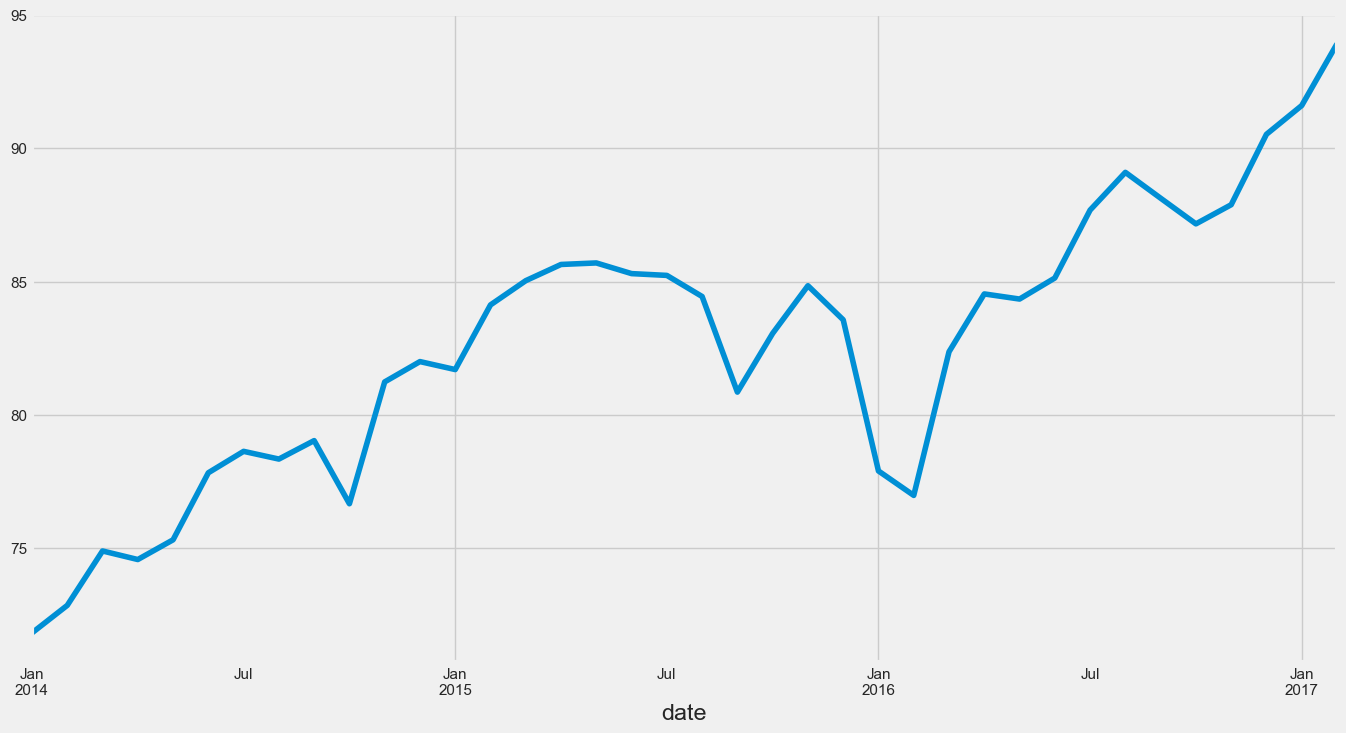

In [281]:
df.close.plot(figsize=(15, 8))

<Axes: xlabel='date'>

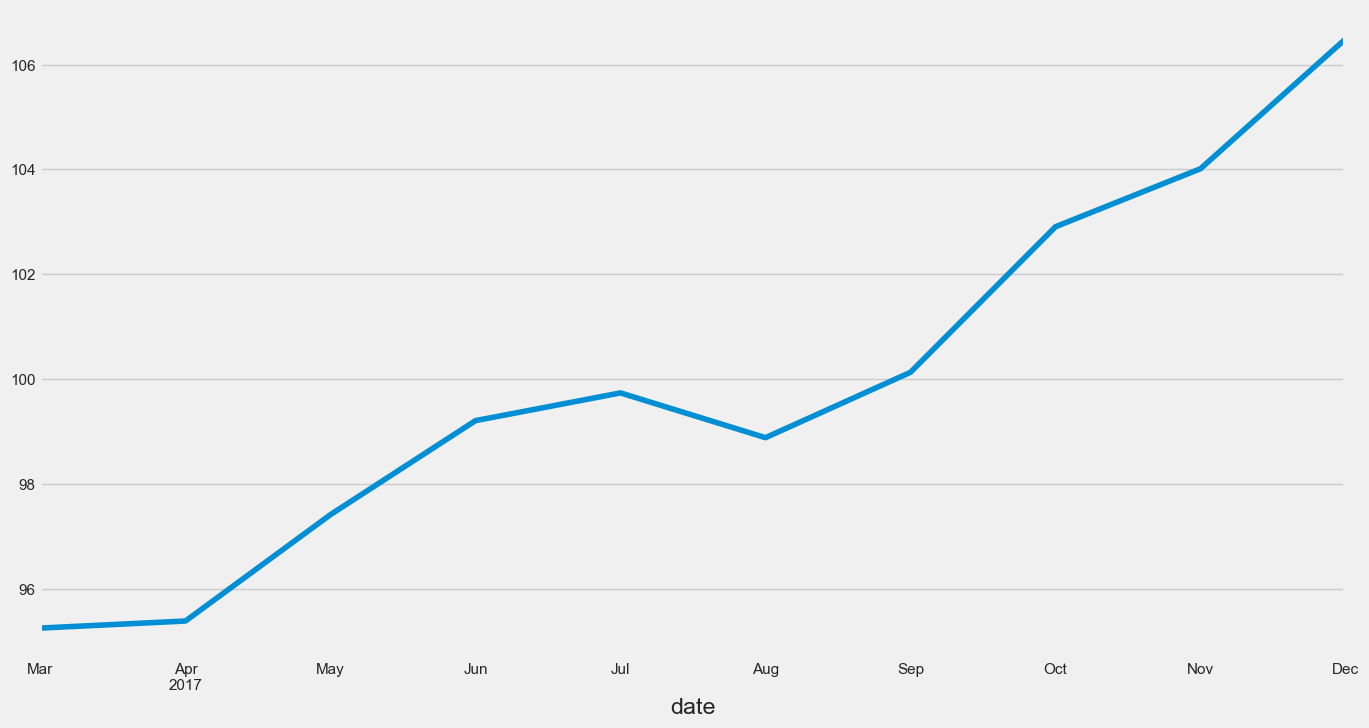

In [283]:
df_test.close.plot(figsize=(15, 8))

In [287]:
sts.adfuller(df.close)

(-0.613701042319159,
 0.8678560018917938,
 2,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 116.05872393286202)

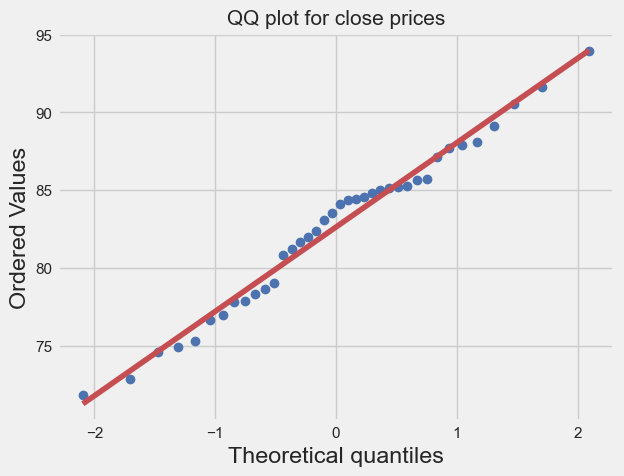

In [295]:
scipy.stats.probplot(df.close, plot = pylab)
plt.title('QQ plot for close prices', size=15)
plt.show()

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2014-01-31 to 2017-02-28
Freq: ME
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    38 non-null     float64
 1   high    38 non-null     float64
 2   low     38 non-null     float64
 3   close   38 non-null     float64
 4   volume  38 non-null     float64
dtypes: float64(5)
memory usage: 2.8 KB


In [299]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2017-03-31 to 2017-12-31
Freq: ME
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    10 non-null     float64
 1   high    10 non-null     float64
 2   low     10 non-null     float64
 3   close   10 non-null     float64
 4   volume  10 non-null     float64
dtypes: float64(5)
memory usage: 480.0 bytes


In [330]:
plt.style.use('default')

<Axes: xlabel='close', ylabel='Density'>

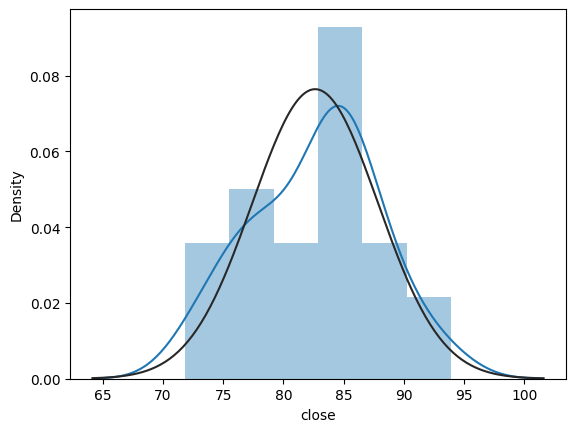

In [332]:
from numpy.random import normal, seed
from scipy.stats import norm
sns.distplot(df.close, fit=norm, kde=True)

In [311]:
df_stationary = df.diff().dropna()

In [319]:
sts.adfuller(df_stationary.close)

(-5.80368052419321,
 4.5686857958187386e-07,
 1,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 109.63687590295554)

In [321]:
import warnings
warnings.filterwarnings('ignore')

### Non Stationary ACF & PACF plots

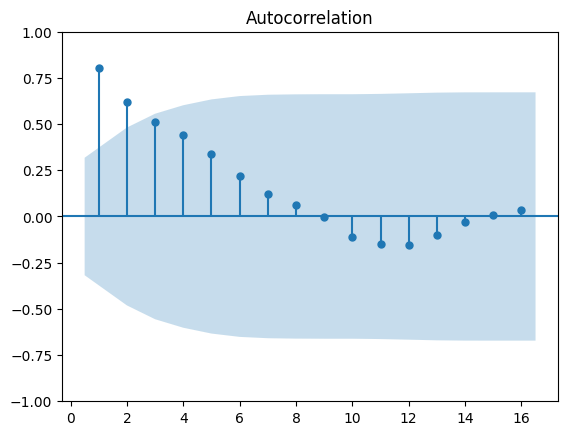

In [344]:
sgt.plot_acf(df.close, zero = False)
plt.show()

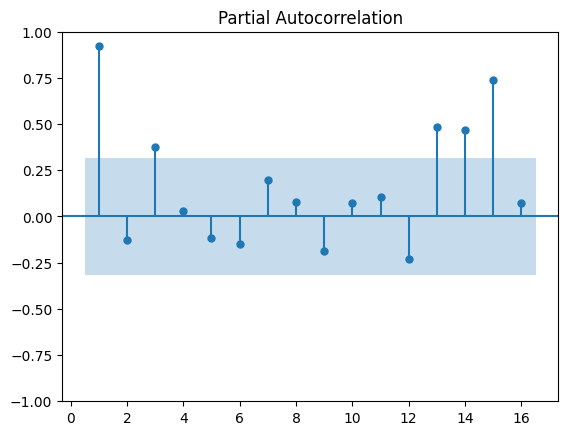

In [348]:
sgt.plot_pacf(df.close, zero = False, method = ('ols'))
plt.show()

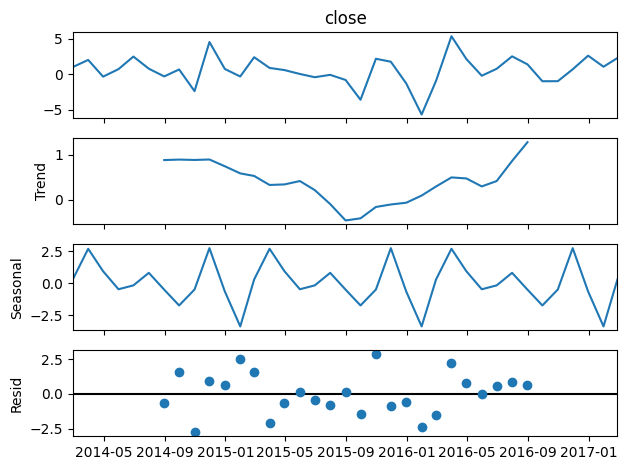

In [372]:
seasonal_additive = seasonal_decompose(df_stationary.close, model = 'additive')
seasonal_additive.plot()
plt.show()

### Stationary ACF & PACF plots

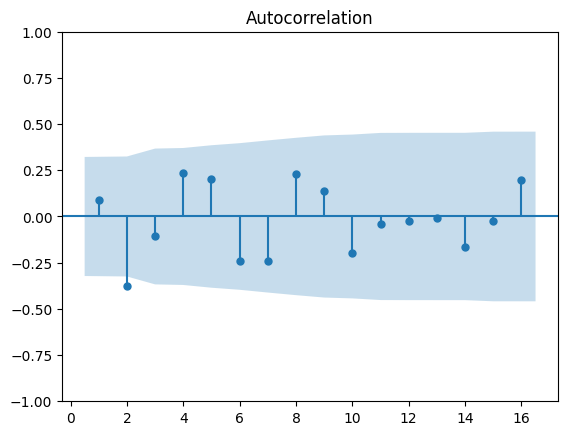

In [338]:
sgt.plot_acf(df_stationary.close, zero = False)
plt.show()

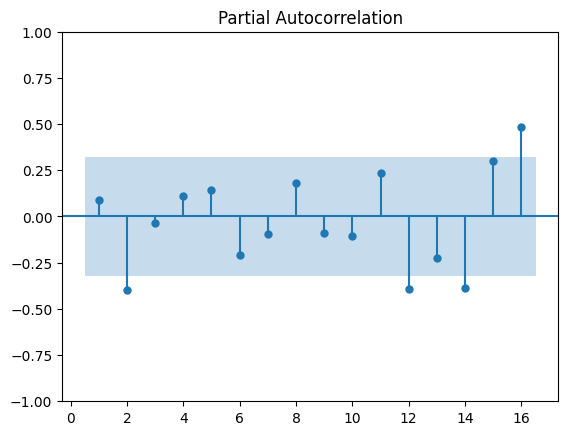

In [340]:
sgt.plot_pacf(df_stationary.close, zero = False, method=('ols'))
plt.show()

In [359]:
# seasonal_multiplicative = seasonal_decompose(df_stationary.close, model = 'multiplicative')
# seasonal_multiplicative.plot()
# plt.show()

In [399]:
model_ar2_ma2 = SARIMAX(df_stationary.close, order = (2, 0, 2))
result_ar2_ma2 = model_ar2_ma2.fit()

In [380]:
residuals_ar2_ma2 = result_ar2_ma2.resid

In [382]:
mae = np.mean(np.abs(residuals_ar2_ma2))
mae

1.3884723414484093

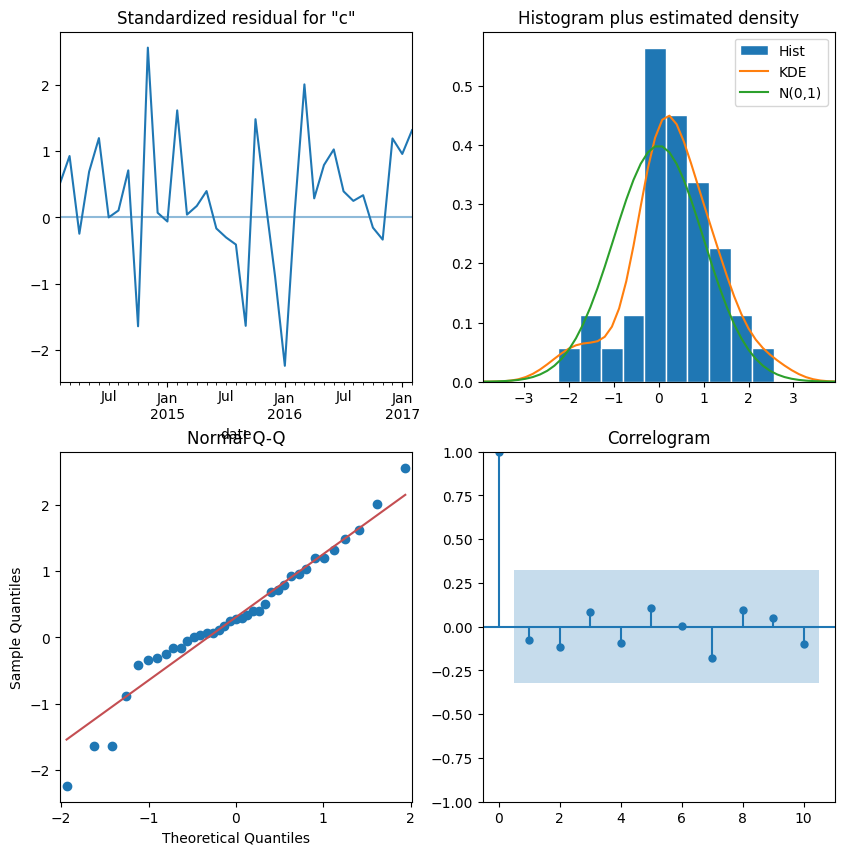

In [386]:
result_ar2_ma2.plot_diagnostics(figsize=(10, 10))
plt.show()

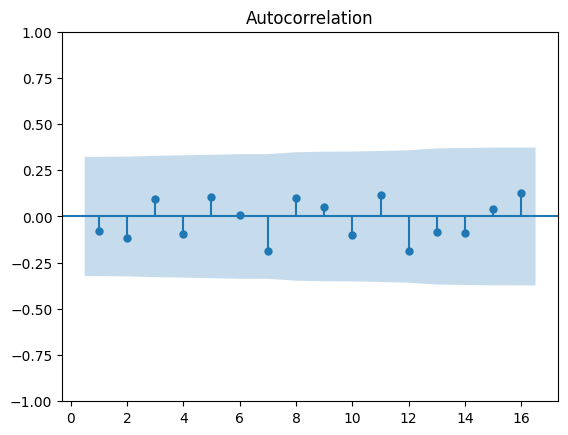

In [397]:
sgt.plot_acf(residuals_ar2_ma2, zero = False)
plt.show()

In [401]:
print(result_ar2_ma2.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   37
Model:               SARIMAX(2, 0, 2)   Log Likelihood                 -75.743
Date:                Tue, 04 Mar 2025   AIC                            161.486
Time:                        11:35:14   BIC                            169.540
Sample:                    02-28-2014   HQIC                           164.325
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0374      0.175     -0.214      0.831      -0.379       0.305
ar.L2         -0.8846      0.220     -4.021      0.000      -1.316      -0.453
ma.L1          0.2492      0.236      1.055      0.2

In [403]:
result_ar2_ma2.aic

161.48563627895348

In [405]:
result_ar2_ma2.bic

169.5402258421746

In [407]:
result_ar2_ma2.llf

-75.74281813947674

In [409]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [411]:
decomp_results = seasonal_decompose(df_stationary.close, period = 12)

In [413]:
type(decomp_results)

statsmodels.tsa.seasonal.DecomposeResult

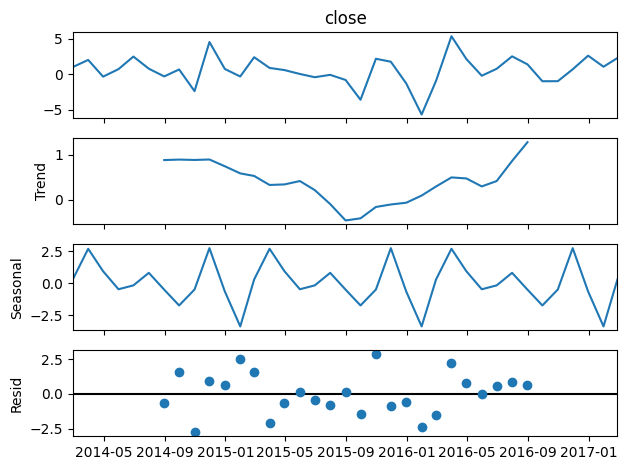

In [415]:
decomp_results.plot()
plt.show()

=> Looking at ACF for Non stationary data also you can find the seasonality.

=> looking into seasonal decompose, look 2015-01, 2016-01, 2017-01, they are similar, meaning that seasonality occurs in each year, yearly seasonality which is in 12 months, it occurs. So s = 12, also my frequency is also in monthly basis. 

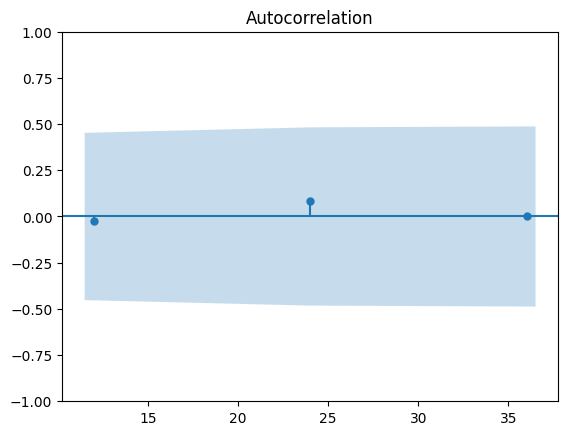

In [433]:
sgt.plot_acf(df_stationary.close, lags = [12, 24, 36])
plt.show()

In [469]:
# sgt.plot_pacf(df_stationary.close, lags=[12, 13], method=('ols'))
# plt.show()

In [467]:
model_s12_ar2_ma2 = SARIMAX(df_stationary.close, order = (2, 0, 2),
                            seasonal_order=(0, 0, 0, 12))
result_s12_ar2_ma2 = model_s12_ar2_ma2.fit()

In [471]:
residuals_s12_ar2_ma2 = result_s12_ar2_ma2.resid

In [473]:
mae = np.mean(np.abs(residuals_s12_ar2_ma2))
mae

1.3884723414484093

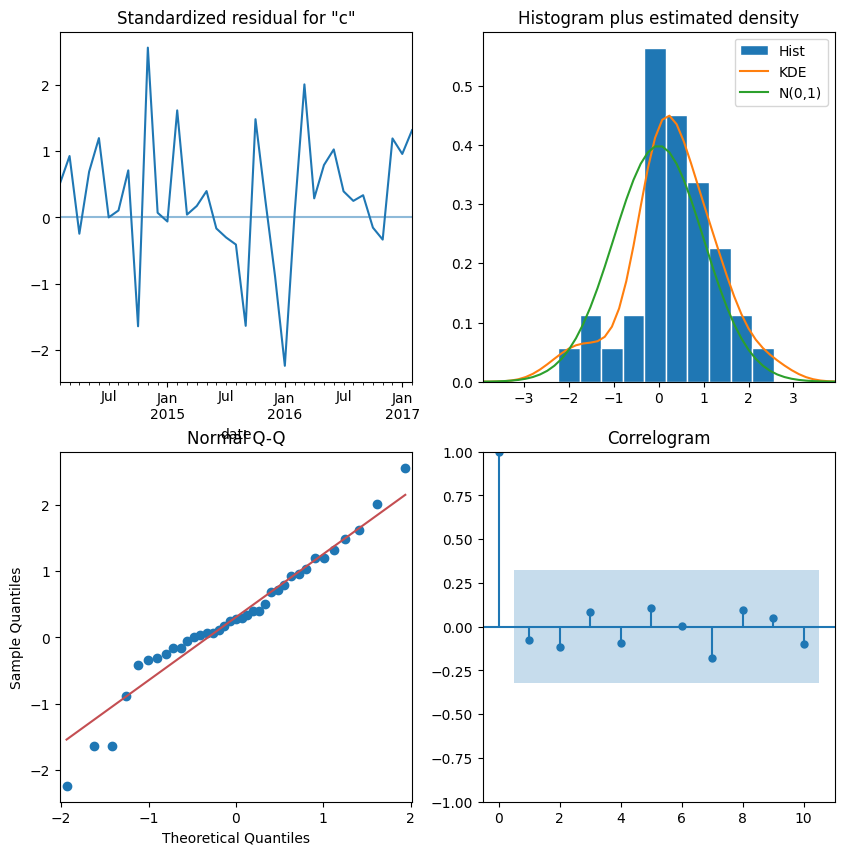

In [475]:
result_s12_ar2_ma2.plot_diagnostics(figsize=(10, 10))
plt.show()

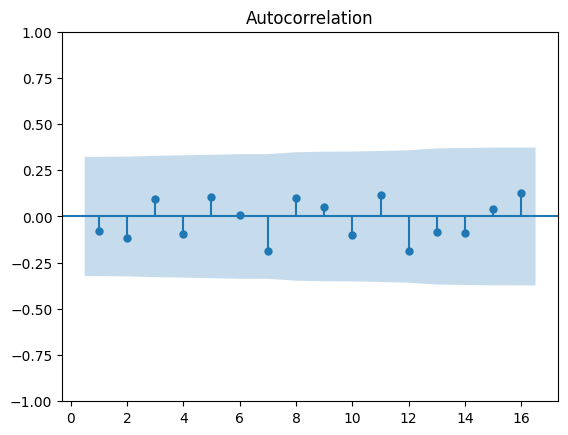

In [477]:
sgt.plot_acf(residuals_s12_ar2_ma2, zero = False)
plt.show()

In [481]:
print(result_s12_ar2_ma2.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   37
Model:               SARIMAX(2, 0, 2)   Log Likelihood                 -75.743
Date:                Tue, 04 Mar 2025   AIC                            161.486
Time:                        11:57:20   BIC                            169.540
Sample:                    02-28-2014   HQIC                           164.325
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0374      0.175     -0.214      0.831      -0.379       0.305
ar.L2         -0.8846      0.220     -4.021      0.000      -1.316      -0.453
ma.L1          0.2492      0.236      1.055      0.2

In [483]:
import pmdarima as pm

In [487]:
results = pm.auto_arima(df.close)

In [489]:
results

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [491]:
results_stationary = pm.auto_arima(df_stationary.close)

In [493]:
results_stationary

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [495]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   38
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 -73.860
Date:                Tue, 04 Mar 2025   AIC                            159.720
Time:                        11:59:07   BIC                            169.386
Sample:                    01-31-2014   HQIC                           163.128
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1531      0.688      1.676      0.094      -0.196       2.502
ar.L1          0.0061      0.168      0.036      0.971      -0.323       0.335
ar.L2         -0.9157      0.215     -4.268      0.0

In [497]:
print(results_stationary.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   37
Model:               SARIMAX(2, 0, 2)   Log Likelihood                 -73.860
Date:                Tue, 04 Mar 2025   AIC                            159.720
Time:                        11:59:31   BIC                            169.386
Sample:                    02-28-2014   HQIC                           163.128
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1531      0.688      1.676      0.094      -0.196       2.502
ar.L1          0.0061      0.168      0.036      0.971      -0.323       0.335
ar.L2         -0.9157      0.215     -4.267      0.0

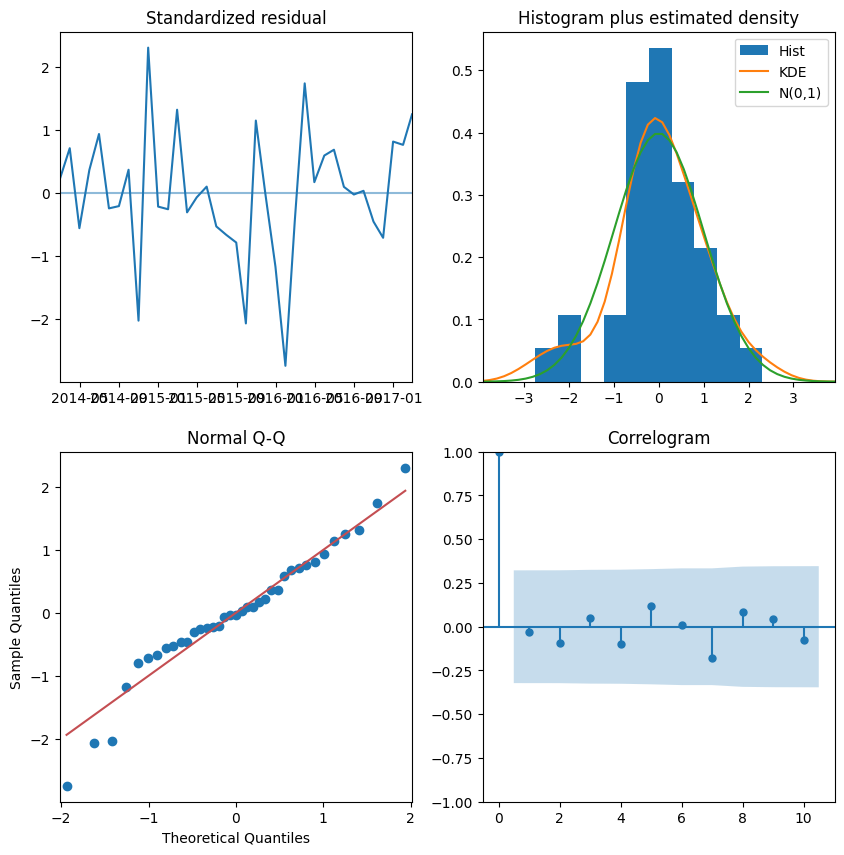

In [501]:
results.plot_diagnostics(figsize=(10, 10))
plt.show()

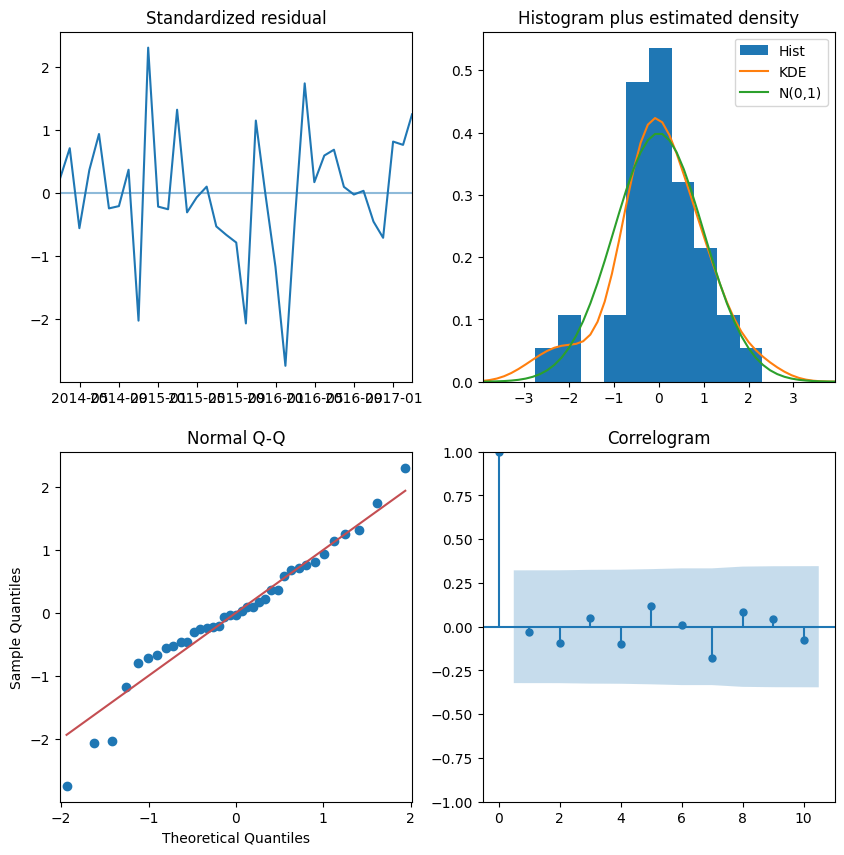

In [503]:
results_stationary.plot_diagnostics(figsize=(10, 10))
plt.show()

In [507]:
results = pm.auto_arima(
    df.close, 
    d = 0,    # non-seasonal difference order
    start_p = 1,
    start_q = 1, 
    max_p = 3, 
    max_q = 3
)

In [509]:
results

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [511]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   38
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -82.050
Date:                Tue, 04 Mar 2025   AIC                            172.100
Time:                        12:01:13   BIC                            178.650
Sample:                    01-31-2014   HQIC                           174.430
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.9439      8.745      0.680      0.497     -11.197      23.085
ar.L1          0.9283      0.109      8.532      0.000       0.715       1.142
ma.L1          0.3660      0.170      2.152      0.0

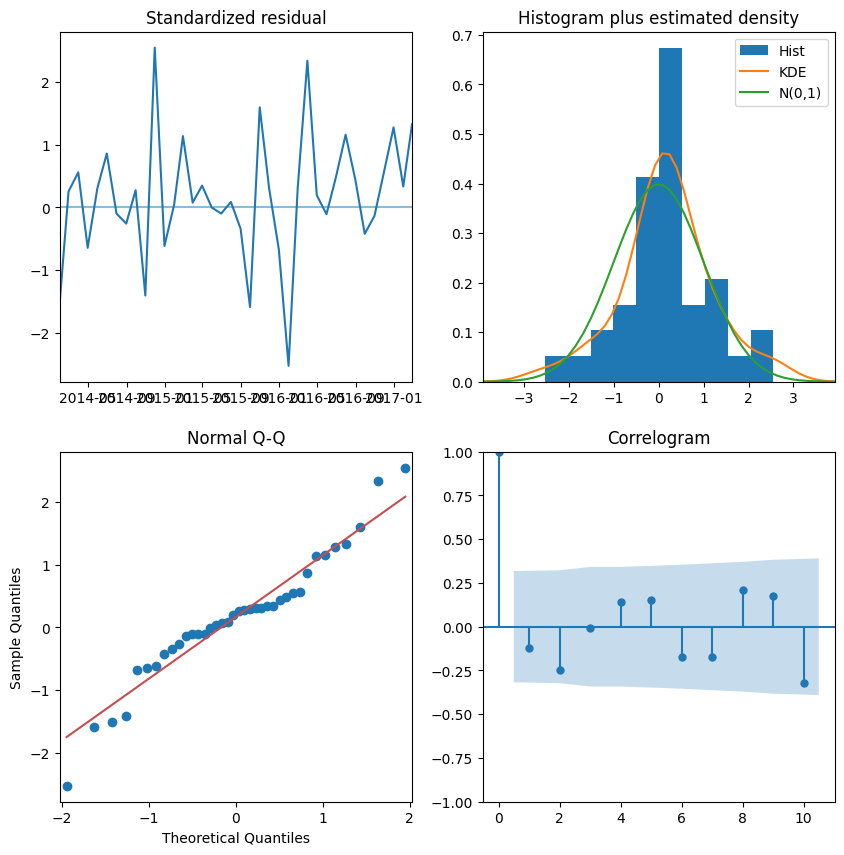

In [515]:
results.plot_diagnostics(figsize=(10, 10))
plt.show()

In [525]:
results = pm.auto_arima(df.close,
    d = 0,    # non-seasonal difference order
    start_p = 1,
    start_q = 1, 
    max_p = 3, 
    max_q = 3,
    seasonal = True, 
    m = 12, 
    D = 1, 
    start_P = 1, 
    start_Q = 1,
    max_P = 2, 
    max_Q = 2,
    information_criterion = 'aic', # used to select best model
    trace = True,  # print results whilst training
    error_action = 'ignore',  #ignore orders that don't work
    stepwise = True  # apply intelligent order search
                       )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=167.434, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=123.881, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=180.497, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=137.550, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=119.127, Time=0.33 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=120.419, Time=0.48 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=0.41 sec
 AR

In [527]:
results

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 1, 1, 12),
      suppress_warnings=True)

In [529]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   38
Model:             SARIMAX(1, 0, 0)x(2, 1, [1], 12)   Log Likelihood                 -53.563
Date:                              Tue, 04 Mar 2025   AIC                            119.127
Time:                                      12:02:48   BIC                            126.675
Sample:                                  01-31-2014   HQIC                           121.300
                                       - 02-28-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6376      4.444      0.368      0.713      -7.073      10.348
ar.L1          0.90

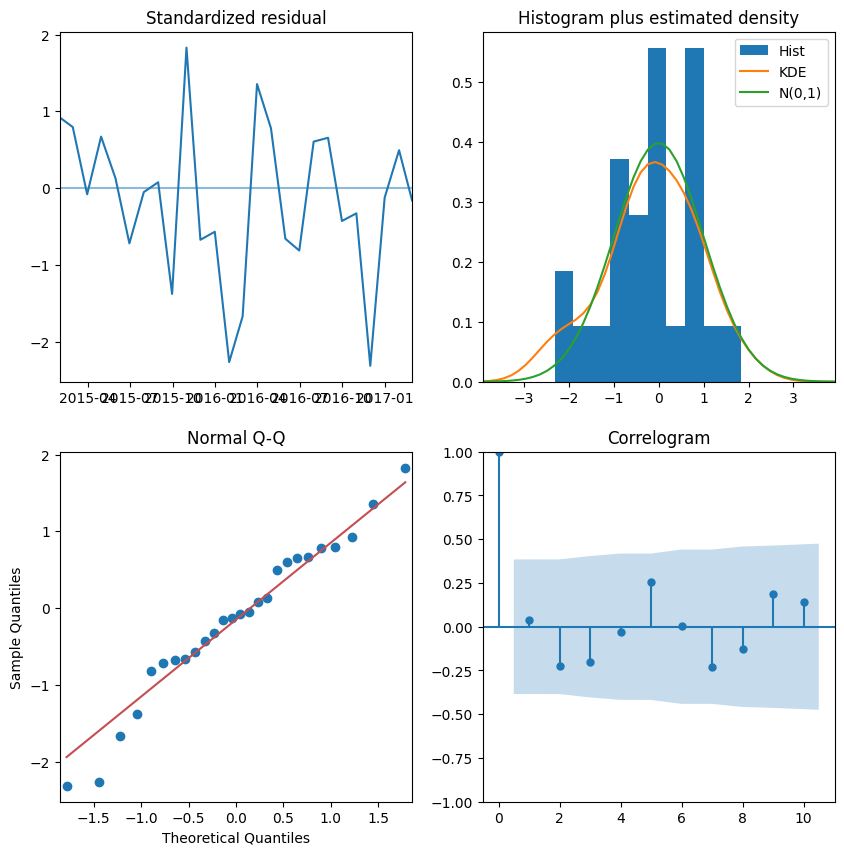

In [539]:
results.plot_diagnostics(figsize=(10, 10))
plt.show()

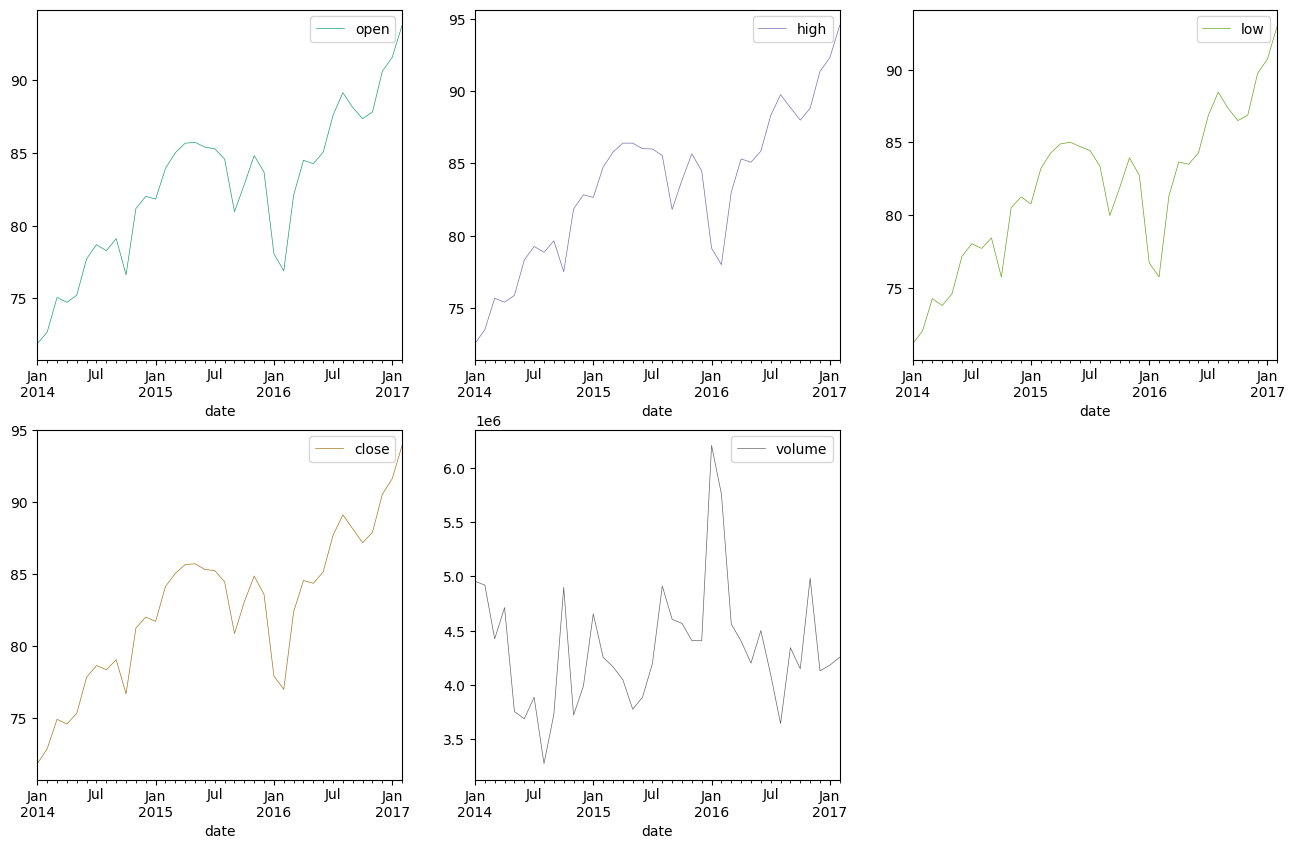

In [537]:
plt.style.use('default')
df.plot(subplots=True,
       colormap = 'Dark2',
       linewidth = 0.5, 
       layout=(2, 3), 
       figsize = (16,  10),
       sharex = False, 
       sharey = False)
plt.show()

In [541]:
model_sarimax = SARIMAX(df.close, order = (2, 1, 2), seasonal_order=(0, 0, 0, 12), 
                       exog = df[['open', 'high', 'low']])

In [543]:
result_sarimax = model_sarimax.fit()

In [545]:
print(result_sarimax.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   38
Model:               SARIMAX(2, 1, 2)   Log Likelihood                  60.624
Date:                Tue, 04 Mar 2025   AIC                           -105.248
Time:                        12:07:52   BIC                            -92.360
Sample:                    01-31-2014   HQIC                          -100.704
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
open          -0.9394      0.155     -6.060      0.000      -1.243      -0.636
high           1.0312      0.069     15.019      0.000       0.897       1.166
low            0.9079      0.095      9.573      0.0

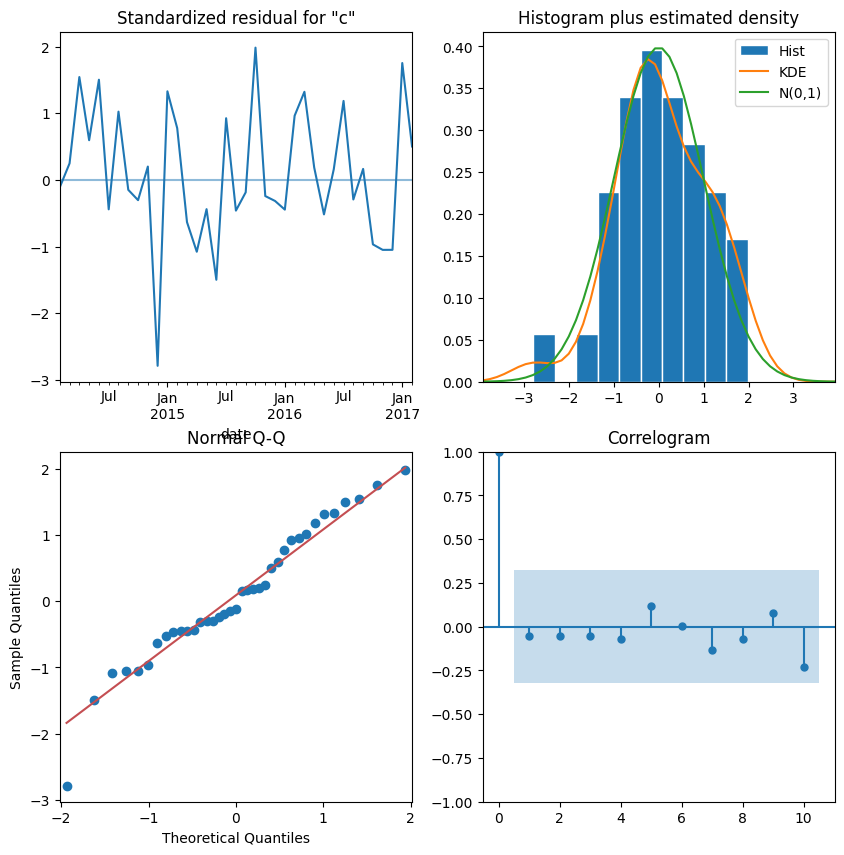

In [547]:
result_sarimax.plot_diagnostics(figsize=(10, 10))
plt.show()

In [549]:
def LLR_test(mod_1, mod_2, DF=1): # DF -> degrees of freedom
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [553]:
from scipy.stats.distributions import chi2

In [561]:
LLR_test(model_ar2_ma2, model_s12_ar2_ma2)

1.0

In [559]:
LLR_test(model_ar2_ma2, model_sarimax)

0.0

In [563]:
LLR_test(model_s12_ar2_ma2, model_sarimax)

0.0

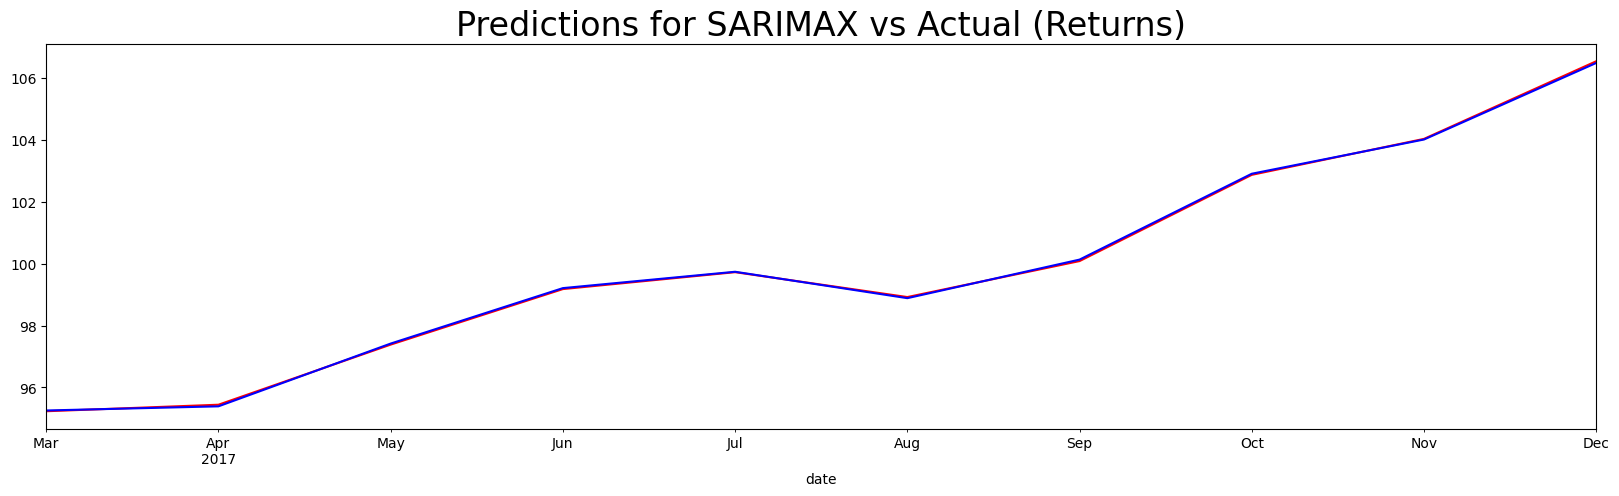

In [577]:
df_pred_sarimax = model_sarimax.fit().predict(start = start_date, end = end_date, 
     exog = df_test[['open', 'high', 'low']][start_date:end_date])
df_pred_sarimax[start_date:end_date].plot(figsize = (20, 5), color = 'red')
df_test.close[start_date:end_date].plot(color = 'blue')
plt.title('Predictions for SARIMAX vs Actual (Returns)', size = 24)
plt.show()

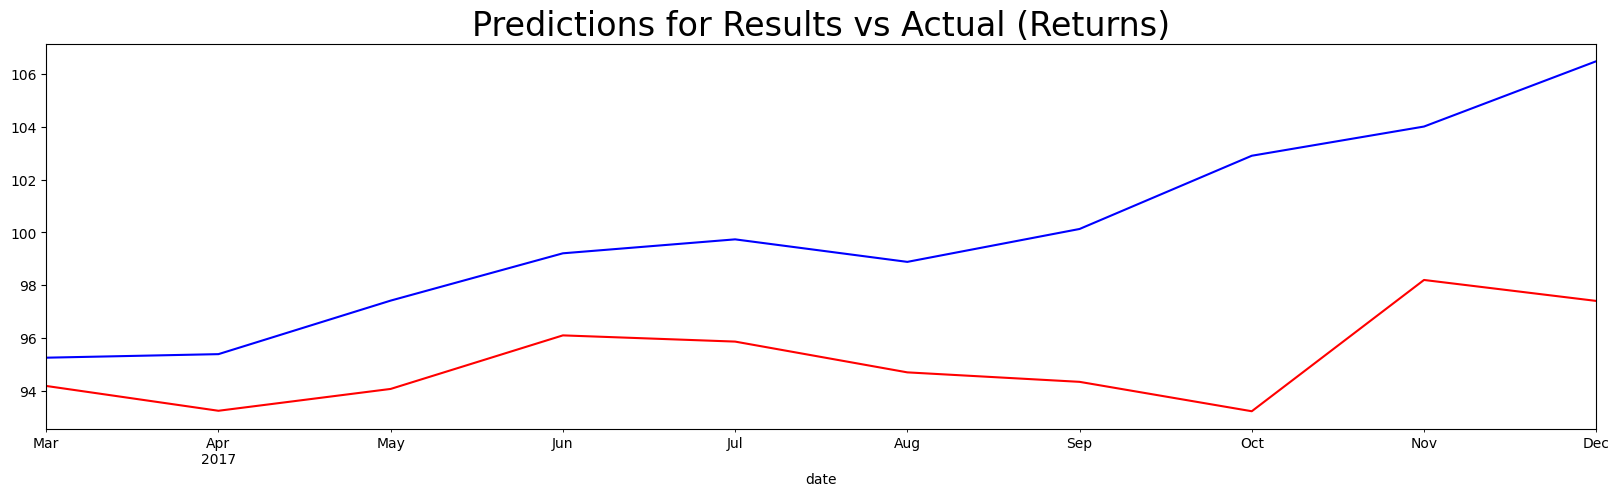

In [589]:
df_pred_arma = results.predict(start = start_date, end = end_date,)
df_pred_arma[start_date:end_date].plot(figsize = (20, 5), color = 'red')
df_test.close[start_date:end_date].plot(color = 'blue')
plt.title('Predictions for Results vs Actual (Returns)', size = 24)
plt.show()